# knn python实现

In [1]:
import numpy as np
import collections
#数据集
def createDataSet():
    group = np.array([[1,101],[5,89],[108,5],[115,8]])#四组二维特征
    labels = ['爱情片','爱情片','动作片','动作片']#四组特征的标签
    return group, labels

dataset, labels = createDataSet()
test_data = [101,20]#测试集

k=3
distances = np.sum((test_data - dataset)**2, axis=1)**0.5#按行
k_labels = [labels[index] for index in distances.argsort()[0:k]]# k个最近的标签
label = collections.Counter(k_labels).most_common(1)[0][0]# 出现次数最多的标签即为最终类别
print(label)

动作片


In [2]:
#整合代码
import numpy as np
import collections
def classify(inx, dataset, labels, k):
    dist = np.sum((inx - dataset)**2, axis=1)**0.5# 计算距离
    k_labels = [labels[index] for index in dist.argsort()[0 : k]]# k个最近的标签
    label = collections.Counter(k_labels).most_common(1)[0][0]# 出现次数最多的标签即为最终类别
    return label


#创建数据集
group, labels = createDataSet()
#测试集
test = [101,20]
#kNN分类
test_class0 = classify(test, group, labels, 3)
print(test_class0)

动作片


# 约会网站测试

## 读取数据

In [3]:
import numpy as np
import pandas as pd
data=pd.read_csv('D:\CDA\File\datingTestSet.txt',sep='	',names=['x1','x2','x3','y'])
datingDataMat=data.loc[:,'x1':'x3']
datingLabels=data.loc[:,'y':]
datingLabels.head()

,y
0,largeDoses
1,smallDoses
2,didntLike
3,didntLike
4,didntLike


## 计算错误率

In [5]:
#计算错误率
datingData=data.loc[:,'x1':'x3']
datingLabels=data['y']
#数据归一化
df_norm = (datingData - datingData.min()) / (datingData.max() - datingData.min())
errorCount = 0.0
for i in range(100):#前100作为测试，后900个作为训练
	classifierResult = classify(df_norm.values[i,:], df_norm.values[100:1001,:],list(datingLabels[100:1000]), 4)
	print("预测结果:%s\t真实类别:%s" % (classifierResult, datingLabels[i]))
	if classifierResult is not datingLabels[i]:
		errorCount += 1.0
print("错误率:%f%%" %(errorCount/float(100)*100))

预测结果:largeDoses	真实类别:largeDoses
预测结果:smallDoses	真实类别:smallDoses
预测结果:didntLike	真实类别:didntLike
预测结果:didntLike	真实类别:didntLike
预测结果:didntLike	真实类别:didntLike
预测结果:didntLike	真实类别:didntLike
预测结果:largeDoses	真实类别:largeDoses
预测结果:largeDoses	真实类别:largeDoses
预测结果:didntLike	真实类别:didntLike
预测结果:largeDoses	真实类别:largeDoses
预测结果:didntLike	真实类别:didntLike
预测结果:didntLike	真实类别:didntLike
预测结果:smallDoses	真实类别:smallDoses
预测结果:didntLike	真实类别:didntLike
预测结果:didntLike	真实类别:didntLike
预测结果:didntLike	真实类别:didntLike
预测结果:didntLike	真实类别:didntLike
预测结果:didntLike	真实类别:didntLike
预测结果:smallDoses	真实类别:smallDoses
预测结果:largeDoses	真实类别:largeDoses
预测结果:smallDoses	真实类别:smallDoses
预测结果:didntLike	真实类别:didntLike
预测结果:smallDoses	真实类别:smallDoses
预测结果:largeDoses	真实类别:largeDoses
预测结果:smallDoses	真实类别:smallDoses
预测结果:largeDoses	真实类别:largeDoses
预测结果:smallDoses	真实类别:smallDoses
预测结果:largeDoses	真实类别:largeDoses
预测结果:smallDoses	真实类别:smallDoses
预测结果:didntLike	真实类别:didntLike
预测结果:largeDoses	真实类别:largeDoses
预测结果:didntLike	真实类别:didntLike
预测结果:l

## 完整可用系统

In [7]:
# -*- coding: utf-8 -*-
#构建完成可用系统    
ffMiles = float(input("每年获得的飞行常客里程数:"))
precentTats = float(input("玩视频游戏所耗时间百分比:"))
iceCream = float(input("每周消费的冰激淋公升数:"))    

inArr = np.array([ffMiles, precentTats, iceCream])
norminArr = np.array((inArr - datingData.min()) / (datingData.max() - datingData.min()))

classifierResult = classify(norminArr, df_norm.values, list(datingLabels), 4)
#打印结果
print("你可能%s这个人" %(classifierResult))

每年获得的飞行常客里程数:100
玩视频游戏所耗时间百分比:30
每周消费的冰激淋公升数:59
你可能smallDoses这个人


# sklearn中的knn

## 分类

In [66]:
#分类
X = [[0], [1], [2], [3]]
y = [0,0,1,1]

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 
print(neigh.predict_proba([[1.1]]))

a=neigh.predict([[1.1]])
print(a)

[[0.66666667 0.33333333]]
[0]


'a'

### 鸢尾花分类

In [8]:
#鸢尾花分类
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# 导入鸢尾花数据并查看数据特征
iris = datasets.load_iris()
print('数据量',iris.data.shape)
# 拆分属性数据
iris_X = iris.data
# 拆分类别数据
iris_y = iris.target
iris_train_X , iris_test_X, iris_train_y ,iris_test_y = train_test_split(iris_X, iris_y, test_size=0.2,random_state=0)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris_train_X, iris_train_y)
predict_result=knn.predict(iris_test_X)
print('预测结果',predict_result)
# 计算预测的准确率
print('预测准确率',knn.score(iris_test_X, iris_test_y))

数据量 (150, 4)
预测结果 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
预测准确率 1.0


## 回归

In [9]:
#回归
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, y) 
print(neigh.predict([[1.5]]))

[0.5]


### 波士顿房价预测

In [44]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
# 1、加载数据集
ld = load_boston()
x_train,x_test,y_train,y_test = train_test_split(ld.data,ld.target,test_size=0.25,random_state=4 )

In [45]:
# 2、标准化处理
# 特征值处理
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

In [46]:
# knn回归
knn=KNeighborsRegressor().fit(x_train,y_train)
knn.score(x_test,y_test)

0.7532231562334272

In [47]:
# LinearRegression
lr=LinearRegression().fit(x_train,y_train)
lr.score(x_test,y_test)

0.7313816523148401

### 学习曲线

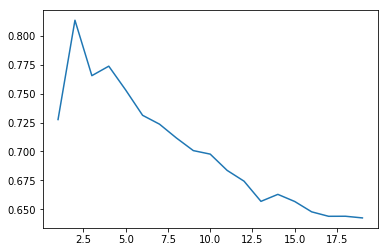

2


In [55]:
krange = range(1,20)
score=[]
for i in krange:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    score.append(knn.score(x_test,y_test))
plt.plot(krange,score)
plt.show()
print(score.index(max(score))+1)

## 参数优化

In [58]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':range(1,20)}
knn = KNeighborsRegressor()
grid_search=GridSearchCV(knn,param_grid=params,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

D:\conda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 3}

In [59]:
grid_search.score(x_test,y_test)

0.765642183652616

# knn手写数字识别

In [61]:
#knn手写数字识别
import os
os.chdir('D:\\CDA\\File')
import numpy as np
from os import listdir
from sklearn.neighbors import KNeighborsClassifier as kNN
 
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    return returnVect

#训练集
hwLabels = []                                       #测试集的Labels，后面用来比对计算错误率
trainingFileList = listdir('trainingDigits')        #listdir()是返回目录下的文件名
m = len(trainingFileList)                           #返回文件夹下文件的个数
trainingMat = np.zeros((m, 1024))                   #初始化训练的Mat矩阵,测试集，就是批量处理
for i in range(m):                                  #从文件名中解析出训练集的类别
    fileNameStr = trainingFileList[i]               #获得文件的名字；是为了下一步获取每个文件的数字类别
    classNumber = int(fileNameStr.split('_')[0])    #获得分类的数字；因为分隔后的第一个是代表类别的数字
    hwLabels.append(classNumber)                    #将获得的类别添加到hwLabels中
    trainingMat[i,:] = img2vector('trainingDigits/%s' % (fileNameStr))     #将每一个文件的1x1024数据存储到trainingMat矩阵中，trainingMat最后是m行1024列的矩阵

#测试集   
testFileList = listdir('testDigits')                #返回testDigits目录下的文件列表   同样也要对测试集进行相同的处理
testLabels = [] 
mTest = len(testFileList)                           #测试数据的数量
testMat = np.zeros((mTest, 1024)) 
for i in range(mTest):                              #从文件中解析出测试集的类别并进行分类测试  
    fileNameStr = testFileList[i]                   #获得文件的名字
    classNumber = int(fileNameStr.split('_')[0])    #获得分类的数字
    testLabels.append(classNumber) 
    testMat[i,:] = img2vector('testDigits/%s' % (fileNameStr))     #获得测试集的1x1024向量,用于训练   
    
classifier = kNN(n_neighbors = 3).fit(trainingMat, hwLabels)
classifier.score(testMat, testLabels)#准确率

0.9873150105708245